In [1]:
import pandas as pd
import os
import sys

In [2]:
path = os.path.dirname(os.getcwd())

In [3]:
df = pd.read_csv(path  + "\primaryschool.csv",names = ["Time","ID1","ID2","Class1","Class2"])
mtd = pd.read_csv(path + "\metadata.csv",sep = "\t",names = ["ID","Class","Gender"])
print(df.head())
print(mtd.head())

    Time       ID1       ID2   Class1  Class2
0   Time  Person 1  Person 2  Class1   Class2
1  31220      1558      1567       3B      3B
2  31220      1560      1570       3B      3B
3  31220      1567      1574       3B      3B
4  31220      1632      1818       4B      4B
     ID Class Gender
0  1426    5B      M
1  1427    5B      F
2  1428    5B      M
3  1429    5B      F
4  1430    5B      M


In [4]:
size = df.shape[0]
start_index = mtd["ID"][0]
end_index = mtd["ID"][mtd.shape[0] - 1]
pop_count = end_index - start_index + 1

days = 30
start = int(df["Time"][1])
end = int(df["Time"][size - 1])
Range = (end - start + 1)/20
per_day = Range//days

degree = []
for i in range(pop_count):
    degree.append(0)
    
prev_time = int(df["Time"][1])
time = prev_time
timecount = 0
daycount = 0

D_day = 10

while daycount < D_day:
    if time != prev_time:
        prev_time = time
        timecount += 1
        if timecount%per_day == 0:
            daycount += 1
    
    n1 = int(df["ID1"][time])
    n2 = int(df["ID2"][time])
    degree[n1 - start_index] += 1
    degree[n2 - start_index] += 1
    time += 1


At day 0
Number of susceptible:  386
Number of infected:  12
Number of recovered:  99
After Day  1
Number of susceptible:  370
Number of infected:  25
Number of recovered:  102
After Day  2
Number of susceptible:  357
Number of infected:  31
Number of recovered:  109
After Day  3
Number of susceptible:  353
Number of infected:  26
Number of recovered:  118
After Day  4
Number of susceptible:  322
Number of infected:  50
Number of recovered:  125
After Day  5
Number of susceptible:  309
Number of infected:  48
Number of recovered:  140
After Day  6
Number of susceptible:  297
Number of infected:  46
Number of recovered:  154
After Day  7
Number of susceptible:  297
Number of infected:  33
Number of recovered:  167
After Day  8
Number of susceptible:  297
Number of infected:  24
Number of recovered:  176
After Day  9
Number of susceptible:  296
Number of infected:  18
Number of recovered:  183
After Day  10
Number of susceptible:  293
Number of infected:  16
Number of recovered:  188
Aft

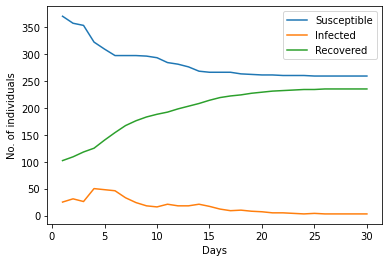

In [5]:
#Percentage of people vaccinated
vac_percent = 20 
no_vaccinated = int(pop_count * (vac_percent/100))

vaccinated = []
deg_count = []

#Finding the list of vaccinated people
for i in range(pop_count):
    if degree[i] != 0:
        deg_count.append([i + start_index,degree[i]])
        
deg_count.sort(key = lambda x: x[1])
L = len(deg_count)

for i in range(no_vaccinated):
    if i < L:
        vaccinated.append(deg_count[i][0])
    else:
        break

sys.path.append('../')

from utils import SIR,run
model = SIR()
model.S = []
model.I = []
model.R = []
model.T = []
model.suscepted = []
model.infected = []
model.recovered = []
run(model,vaccinated) 
print(max(model.I))

In [19]:
del(model)